# The Collinearity Problem

## (a) Generating the data

In this problem the data are $(\mathbf{X}, Y)$ where $\mathbf{X}=(X_1, X_2)$ and

- $X_1 \sim \text{Uniform}(0,1)$
- $X_2 = \frac{1}{2}X_2 + \frac{1}{100}Z$ where $Z\sim \text{Normal}(0,1)$
- $Y = 2 + 2X_1 + \frac{3}{10} X_2 + \epsilon$

The regression coefficients are

$$(\beta_0, \beta_1, \beta_2) = (2, 2, \frac{3}{10})$$

In [1]:
import numpy as np
import pandas as pd

# set seed state for reproducibility
np.random.seed(0)

# generate data
x1 = np.random.uniform(size=100)
x2 = 0.5*x1 + np.random.normal(size=100)/100
y = 2 + 2*x1 + 0.3*x2

# collect data in dataframe
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y':y})
data.head()

,x1,x2,y
0,0.548814,0.262755,3.176454
1,0.715189,0.366603,3.540360
2,0.602763,0.306038,3.297338
3,0.544883,0.257079,3.166890
4,0.423655,0.226710,2.915323


## (b) Correlation among predictors

The correlation matrix is

In [2]:
data.corr()

,x1,x2,y
x1,1.000000,0.997614,0.999988
x2,0.997614,1.000000,0.997936
y,0.999988,0.997936,1.000000


so the correlation among the predictors is approximately

In [3]:
round(data.corr().x1.x2, 3)

0.998

The scatterplot is

In [4]:
import seaborn as sns

sns.scatterplot(data.x1, data.x2)

## (c) Fitting a full OLS linear regression model

In [5]:
import statsmodels.formula.api as smf

full_model = smf.ols('y ~ x1 + x2', data=data).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.237e+30
Date:                Sun, 11 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:03:46   Log-Likelihood:                 3206.0
No. Observations:                 100   AIC:                            -6406.
Df Residuals:                      97   BIC:                            -6398.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0000   5.67e-16   3.53e+15      0.000       2.000       2.000
x1             2.0000   1.47e-14   1.36e+14      0.000       2.000       2.000
x2             0.3000   2.94e-14   1.02e+13      0.000       0.300       0.300
==============================================================================
Omnibus:                        4.521   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.208
Skew:                          -0.288   Prob(JB):                        0.201
Kurtosis:                       2.338   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We find the estimators $(\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2})$ are

In [6]:
full_model.params

Intercept    2.0
x1           2.0
x2           0.3
dtype: float64

which is identical to $(\beta_0, \beta_1, \beta_2)$.

The p-values for the estimators are

In [7]:
full_model.pvalues

Intercept    0.0
x1           0.0
x2           0.0
dtype: float64

So we can definitely reject the null hypotheses 

$$H_{0}^i: \beta_i = 0\qquad{0 \leqslant i \leqslant 2}$$

## (d) Fitting an OLS linear regression model on $X_1$

In [8]:
x1_model = smf.ols('y ~ x1', data=data).fit()
x1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.215e+06
Date:                Sun, 11 Nov 2018   Prob (F-statistic):          7.26e-229
Time:                        14:03:46   Log-Likelihood:                 439.40
No. Observations:                 100   AIC:                            -874.8
Df Residuals:                      98   BIC:                            -869.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0007      0.001   3450.157      0.000       2.000       2.002
x1             2.1498      0.001   2052.992      0.000       2.148       2.152
==============================================================================
Omnibus:                       11.746   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.097
Skew:                           0.138   Prob(JB):                        0.129
Kurtosis:                       2.047   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case, $\hat{\beta}_0 = \beta_0 = 2$ but $\hat{\beta}_1 = 2.1498$ is a little off. 

However, the p-value for $\hat{\beta_1}$ are still zero, so we again reject the null hypothesis $H_0: \beta_1 = 0$.

## (e) Fitting an OLS linear regression model on $X_2$

In [9]:
x2_model = smf.ols('y ~ x2', data=data).fit()
x2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.366e+04
Date:                Sun, 11 Nov 2018   Prob (F-statistic):          1.14e-118
Time:                        14:03:46   Log-Likelihood:                 180.49
No. Observations:                 100   AIC:                            -357.0
Df Residuals:                      98   BIC:                            -351.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9957      0.008    257.091      0.000       1.980       2.011
x2             4.2860      0.028    153.832      0.000       4.231       4.341
==============================================================================
Omnibus:                       12.365   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.200
Skew:                          -0.139   Prob(JB):                        0.122
Kurtosis:                       2.035   Cond. No.                         7.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case, $\hat{\beta}_0 = \beta_0 = 2$ but $\hat{\beta}_2 = 4.2860$ is way off. 

However, the p-value for $\hat{\beta_1}$ are still zero, so we again reject the null hypothesis $H_0: \beta_1 = 0$.

## (f) Do these results contradict each other?

Given that the authors want us to consider the correlation between the predictors, I think the intent of this question is to encourage us to wonder why, if $X_1, X_2$ are so strongly correlated, did the $X_1$ model do such a great job of estimating $\beta_1$ while the $X_2$ model did a poor job of estimating $\beta_2$?

It's not clear how to answer this question.

## (g) Adding a mismeasured observation

First we add the new, mismeasured observation

In [10]:
new_row = pd.DataFrame({'x1': [0.1], 'x2': [0.8], 'y':[6]})
data = pd.concat([data, new_row]).reset_index()
data.tail()

,index,x1,x2,y
96,96,0.586513,0.285222,3.258593
97,97,0.020108,0.003158,2.041163
98,98,0.828940,0.409915,3.780854
99,99,0.004695,0.002523,2.010148
100,0,0.100000,0.800000,6.000000


Now we refit the models from (c)-(e).

In [11]:
full_model = smf.ols('y ~ x1 + x2', data=data).fit()
x1_model = smf.ols('y ~ x1', data=data).fit()
x2_model = smf.ols('y ~ x2', data=data).fit()

In [12]:
full_model.params

Intercept    1.991550
x1          -0.337428
x2           4.975187
dtype: float64

In [13]:
x1_model.params

Intercept    2.115685
x1           1.984495
dtype: float64

In [14]:
x2_model.params

Intercept    1.968755
x2           4.419615
dtype: float64

Now the paramter estimates of both the full model and $X_2$-only model are off, while the $X_1$-only model is pretty close. 

In [15]:
full_model.pvalues

Intercept    1.926622e-133
x1            1.614723e-16
x2            4.878009e-90
dtype: float64

In [16]:
x1_model.pvalues

Intercept    3.830438e-51
x1           5.772966e-28
dtype: float64

In [17]:
x2_model.pvalues

Intercept    9.791075e-121
x2           3.652059e-102
dtype: float64

Both models are still really confident in rejecting the null hypothesis. 

We'll do a scatter plot to see if the new observation is an outlier.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

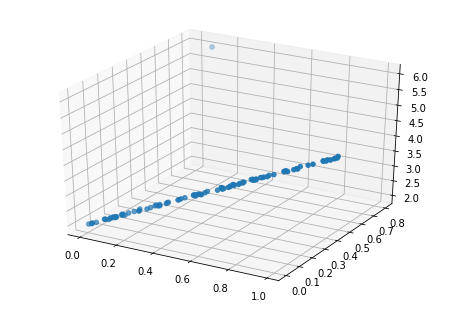

In [19]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(data['x1'], data['x2'], data['y'])

That new observation sure looks like an outlier. If we look at fitted-vs-residuals plots

Text(0,0.5,'studentized resid')

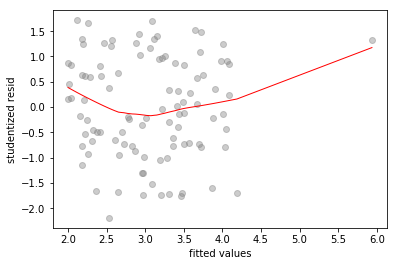

In [20]:
# fitted-vs-residuals for the full model
sns.regplot(full_model.fittedvalues, full_model.resid/full_model.resid.std(),
            lowess=True,
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})
plt.xlabel('fitted values')
plt.ylabel('studentized resid')

Text(0,0.5,'studentized resid')

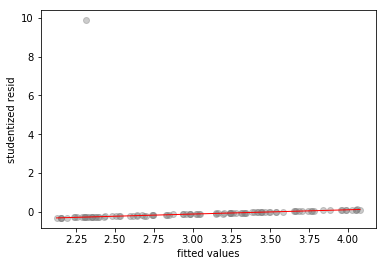

In [21]:
# fitted-vs-residuals for the X1 model
sns.regplot(x1_model.fittedvalues, x1_model.resid/x1_model.resid.std(),
            lowess=True,
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})
plt.xlabel('fitted values')
plt.ylabel('studentized resid')

Text(0,0.5,'studentized resid')

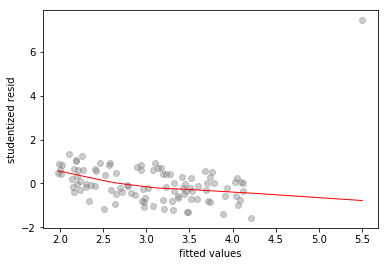

In [22]:
# fitted-vs-residuals for the X2 model
sns.regplot(x2_model.fittedvalues, x2_model.resid/x2_model.resid.std(),
            lowess=True,
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})
plt.xlabel('fitted values')
plt.ylabel('studentized resid')

All three plots show a clear outlier. The $X_1$-only and $X_2$-only models also show high standardized residual values of $\approx 6.5$ and $\approx 10$ respectively, for the outlier.

Now we look at some leverage plots

/Users/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/Users/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


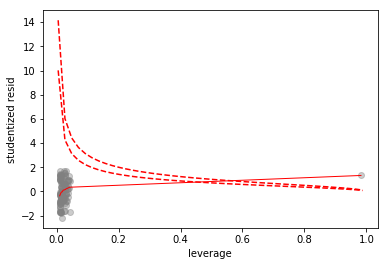

In [54]:
# scatterplot of leverage vs studentized residuals
axes = sns.regplot(full_model.get_influence().hat_matrix_diag, full_model.resid/full_model.resid.std(), 
            lowess=True, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})
plt.xlabel('leverage')
plt.ylabel('studentized resid')

# plot Cook's distance contours for D = 0.5, D = 1
x = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 50)
plt.plot(x, np.sqrt(0.5*(1 - x)/x), color='red', linestyle='dashed')
plt.plot(x, np.sqrt((1 - x)/x), color='red', linestyle='dashed')

Since the mismeasured observation is has a Cook's distance greater than 1, we'll call it a high leverage point.